In [1]:
import torch
import sys
sys.path.append('..')
import helper

batch_size, num_steps = 32, 35
train_iter, vocab = helper.Loader.load_data_time_machine(batch_size, num_steps)

In [2]:
def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size
    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01
    def three():
        return (normal((num_inputs, num_hiddens)),
                normal((num_hiddens, num_hiddens)),
                torch.zeros(num_hiddens, device=device))
    W_xz, W_hz, b_z = three()  # 更新门参数
    W_xr, W_hr, b_r = three()  # 重置门参数
    W_xh, W_hh, b_h = three()  # 候选隐状态参数
    # 输出层
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    # 附加梯度
    params = [W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

In [3]:
def init_gru_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device),)

In [4]:
def gru(inputs, state, params):
    W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    for X in inputs:
        Z = torch.sigmoid((X @ W_xz) + (H @ W_hz) + b_z)
        R = torch.sigmoid((X @ W_xr) + (H @ W_hr) + b_r)
        H_tilda = torch.tanh((X @ W_xh) + ((R * H) @ W_hh) + b_h)
        H = Z * H + (1 - Z) * H_tilda
        Y = H @ W_hq + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H,)

time traveller                                                  
time traveller t at at at at at at at at at at at at at at at at
time travellere the the the the the the the the the the the the 
time travellere the the the the the the the the the the the the 
time travellere the the the the the the the the the the the the 
time travellere the the the the the the the the the the the the 
time travellere the the the the the the the the the the the the 
time travellerererererererererererererererererererererererererer
time traveller and the the the the the the the the the the the t
time traveller and the the the the the the the the the the the t
time traveller and the the the the the the the the the the the t
time travellere the the the the the the the the the the the the 
time travellere the the the the the the the the the the the the 
time traveller the the the the the the the the the the the the t
time traveller the the the the the the the the the the the the t
time traveller and the th

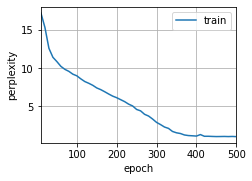

In [5]:
vocab_size, num_hiddens, device = len(vocab), 256, helper.GPU.try_gpu()
num_epochs, lr = 500, 1
model = helper.RNNModelScratch(vocab_size, num_hiddens, device, get_params, init_gru_state, gru)
helper.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

time traveller te te te te te te te te te te te te te te te te t
time traveller the the the the the the the the the the the the t
time travellerererererererererererererererererererererererererer
time travellere the the the the the the the the the the the the 
time travellerererererererererererererererererererererererererer
time travellere the the the the the the the the the the the the 
time traveller and the the the the the the the the the the the t
time traveller the the the the the the the the the the the the t
time travellere the the the the the the the the the the the the 
time traveller the the the the the the the the the the the the t
time traveller and the the the the the the the the the the the t
time traveller the the the the the the the the the the the the t
time traveller and the the the the the the the the the the the t
time traveller the there in the there the the the the the the th
time traveller the there in there in there in there in there in 
time traveller the thing 

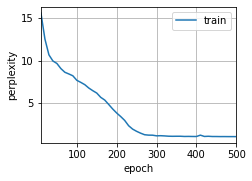

In [6]:
num_inputs = vocab_size
gru_layer = torch.nn.GRU(num_inputs, num_hiddens)
model = helper.RNNModel(gru_layer, vocab_size)
model = model.to(device)
helper.train_ch8(model, train_iter, vocab, lr, num_epochs, device)